<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 7

## 🌻 Welcome to Chapter 5, "Text Augmentation"

In this chapter, you will learn about Text augmentation and how to code the methods in Python. In particular, the topics are as follows: 

- a

# Load Notebook


- This Notebook original link is: 
  - https://github.com/PacktPublishing/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_7.ipynb

# GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [2]:
url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
# url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 37 (delta 9), reused 4 (delta 1), pack-reused 22
Unpacking objects: 100% (37/37), done.


## Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [3]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [4]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

# Run Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [5]:
# %% CARRY-OVER code install

!pip install opendatasets --upgrade
!pip install pyspellchecker 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 10.5 MB/s 


In [6]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


# Verify Pluto

In [7]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/12/15 02:38
                    Platform : linux
     Pluto Version (Chapter) : 2.0
             Python (3.7.10) : actual: 3.8.16 (default, Dec  7 2022, 01:12:13) [GCC 7.5.0]
            PyTorch (1.11.0) : actual: 1.13.0+cu116
              Pandas (1.3.5) : actual: 1.3.5
                 PIL (9.0.0) : actual: 7.1.2
          Matplotlib (3.2.2) : actual: 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


## (Optional) Export to .py

In [8]:
pluto_chapter_5 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_7.py'
!cp {pluto_file} {pluto_chapter_5}

# ✋ Set up Kaggle username and app Key

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.
- STOP: Update your Kaggle access username or key first.

In [9]:
# %%CARRY-OVER code 

# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("duchaba", "059d7f10e1838693868b30e9dbb7c8ce")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Required version 0.7+ 0.7.0


# Fetch Kaggle Data

## music

In [10]:
%%time
url = 'https://www.kaggle.com/datasets/kingofarmy/musical-emotions-classification'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 641M/641M [00:06<00:00, 104MB/s]



CPU times: user 8.18 s, sys: 3.47 s, total: 11.7 s
Wall time: 19.6 s


In [11]:
f = 'kaggle/musical-emotions-classification/Train.csv'
pluto.df_music_data = pluto.fetch_df(f)
pluto.df_music_data.head(3)

,GroupID,ImageID,Target,Shapes
0,Happy102,Happy10200.wav,Happy,220608
1,Happy102,Happy10201.wav,Happy,220608
2,Happy102,Happy10202.wav,Happy,220608


In [12]:
# # /content/kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/Happy/Happy10200.wav
# # remove white space in directory and filename
# # run this until no error/output
# f = 'kaggle/sea-animals-image-dataste'
# #!find {f} -name "* *" -type d | rename 's/ /_/g'
# !find {f} -name "* *" -type f | rename 's/ /_/g'

In [13]:
# %%writefile -a {pluto_chapter_7}

pluto.version = 7.0
# augment full path
@add_method(PacktDataAug)
def _append_music_full_path(self,x):
  y = re.findall('([a-zA-Z ]*)\d*.*', x)[0]
  return (f'kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/{y}/{x}')
#
@add_method(PacktDataAug)
def fetch_music_full_path(self, df):
  df['fname'] = df.ImageID.apply(self._append_music_full_path)
  return df

In [14]:
pluto.fetch_music_full_path(pluto.df_music_data)
pluto.df_music_data.head(3)

,GroupID,ImageID,Target,Shapes,fname
0,Happy102,Happy10200.wav,Happy,220608,kaggle/musical-emotions-classification/Audio_F...
1,Happy102,Happy10201.wav,Happy,220608,kaggle/musical-emotions-classification/Audio_F...
2,Happy102,Happy10202.wav,Happy,220608,kaggle/musical-emotions-classification/Audio_F...


## voices

In [15]:
%%time
url = 'https://www.kaggle.com/datasets/ejlok1/cremad'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 451M/451M [00:05<00:00, 90.7MB/s]



CPU times: user 8.42 s, sys: 2.83 s, total: 11.3 s
Wall time: 17.7 s


In [16]:
# /content/kaggle/cremad/AudioWAV/1001_DFA_ANG_XX.wav
# change method name to make_dir_dframe
f = 'kaggle/cremad/AudioWAV'
pluto.df_voice_data = pluto.make_dir_dataframe(f)
pluto.df_voice_data.head(3)

,fname,label
0,kaggle/cremad/AudioWAV/1045_IEO_FEA_HI.wav,AudioWAV
1,kaggle/cremad/AudioWAV/1034_WSI_DIS_XX.wav,AudioWAV
2,kaggle/cremad/AudioWAV/1053_IEO_ANG_HI.wav,AudioWAV


In [17]:
pluto.df_voice_data.head(3)

,fname,label
0,kaggle/cremad/AudioWAV/1045_IEO_FEA_HI.wav,AudioWAV
1,kaggle/cremad/AudioWAV/1034_WSI_DIS_XX.wav,AudioWAV
2,kaggle/cremad/AudioWAV/1053_IEO_ANG_HI.wav,AudioWAV


## urban sound

In [18]:
%%time
url = 'https://www.kaggle.com/datasets/rupakroy/urban-sound-8k'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 5.61G/5.61G [00:46<00:00, 129MB/s]



CPU times: user 1min 9s, sys: 23.5 s, total: 1min 33s
Wall time: 2min 6s


In [19]:
# /content/kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio/fold1
# change method name to make_dir_dframe
f = 'kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio'
pluto.df_sound_data = pluto.make_dir_dataframe(f)
pluto.df_sound_data.head(3)

,fname,label
0,kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...,fold7
1,kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...,fold7
2,kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...,fold7


# view and listen

In [20]:
# %%writefile -a {pluto_chapter_7}

import IPython
import IPython.display
import librosa
import librosa.display
import matplotlib
import pandas
import numpy

In [52]:
@add_method(PacktDataAug)
def _draw_area_with_neg(self,ndata,pic,tcolor='#007bff',bcolor='#ffc107',alpha=0.75,istart=0):
  nlen = len(ndata)
  i = numpy.arange(istart, istart+nlen)
  xzero = numpy.zeros(nlen)
  # plot line
  pic.plot(i,ndata, linewidth=0.0)  # invisible line for shading
  pic.plot(i,xzero,color='gray',linewidth=0.5) # base line

  # fill top/positive section
  pic.fill_between(
    i, xzero, ndata, where=(ndata >= xzero), 
    interpolate=True, color=tcolor, alpha=alpha, 
    label="Positive"
  )
  # fill bottom/positive section
  pic.fill_between(
    i, xzero, ndata, where=(ndata < xzero), 
    interpolate=True, color=bcolor, alpha=alpha, 
    label="Negative"
  )
  return
#
@add_method(PacktDataAug)
def _draw_audio(self,df):
  zlen = 100
  nrow = 2
  ncol = 1
  w = 11
  h = 6
  title = ['Original', 'Zoom In: From Mid-point to 100+']
  ylabel = ['Waveform Amplitude']
  xlabel = ['In second: Sampling rate', 'Sampling mid-point']
  canvas, pic = matplotlib.pyplot.subplots(nrow, ncol, figsize=(w, h))
  pics = pic.flatten()
  #pics = [pic]
  # 
  samp = df.sample(int(ncol * nrow))
  samp.reset_index(drop=True, inplace=True)
  data_freq, sam_rate = librosa.load(samp.fname[0])
  print(samp.fname[0])
  # df_samp = pandas.DataFrame(data_freq, columns=['data_freq'])
  #
  # draw original
  #df_samp.data_freq.plot.line(ax=pics[0],color='#28a745')
  dlen = len(data_freq)
  self._draw_area_with_neg(data_freq,pic[0])
  pics[0].set_title(title[0], fontsize=16.)
  pics[0].set_xlabel(f'Second: Total {dlen/sam_rate:.2f} sec., Sampling Rate: {sam_rate/1000:.2f} kHz', fontsize=14.)
  pics[0].set_ylabel(ylabel[0])
  #
  loc = numpy.array(pics[0].get_xticks())
  b = loc / sam_rate
  b = numpy.round(b,1)
  pics[0].set_xticklabels(b)
  #lab = pics[0].get_xticklabels()
  #print(f'loc: {loc}, lab: {lab}')
  # s = int(dlen/sam_rate)
  # print(dlen/sam_rate)
  # pics[0].set_xticks(numpy.arange(0,dlen,10))
  pics[0].grid()
  #
  # draw zoom
  mid = int(len(data_freq) / 2)
  end = mid + zlen
  self._draw_area_with_neg(data_freq[mid:end],pic[1])
  #df_samp.data_freq[mid:end].plot.line(ax=pics[1],color='#17a2b8')
  # librosa.display.waveplot(data_freq, sr=sam_rate, ax=ax, color='#17a2b8')
  #
  loc = pics[1].get_xticks()
  lab = pics[1].get_xticklabels()
  print(f'loc: {loc}, lab: {lab}')
  # pics[1].set_xticklabels(['a','Mid','c','d','e','f','g','h'])
  #
  pics[1].set_title(title[1])
  pics[1].grid()
  #
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return 
#
@add_method(PacktDataAug)
def draw_audio(self,df):
  self._draw_audio(df)
#

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/Happy/Happy13613.wav
loc: [-20.   0.  20.  40.  60.  80. 100. 120.], lab: <a list of 8 Text major ticklabel objects>


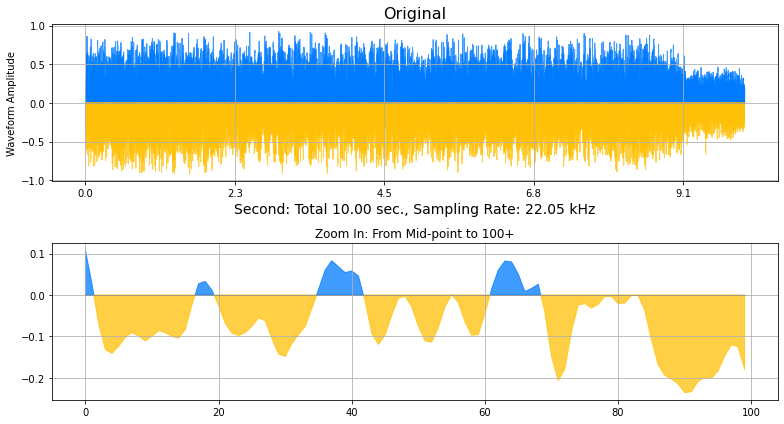

In [53]:
pluto.draw_audio(pluto.df_music_data)

In [ ]:
# waveform amplitude

loc: [-20.   0.  20.  40.  60.  80. 100. 120.], lab: <a list of 8 Text major ticklabel objects>


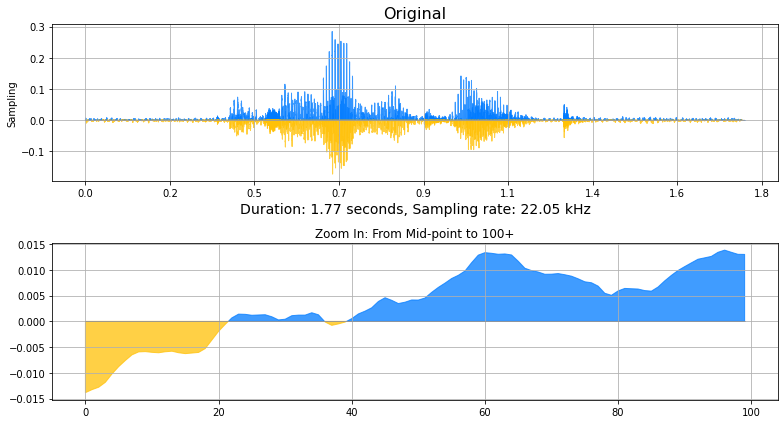

In [43]:
pluto.draw_audio(pluto.df_voice_data)

loc: [-20.   0.  20.  40.  60.  80. 100. 120.], lab: <a list of 8 Text major ticklabel objects>


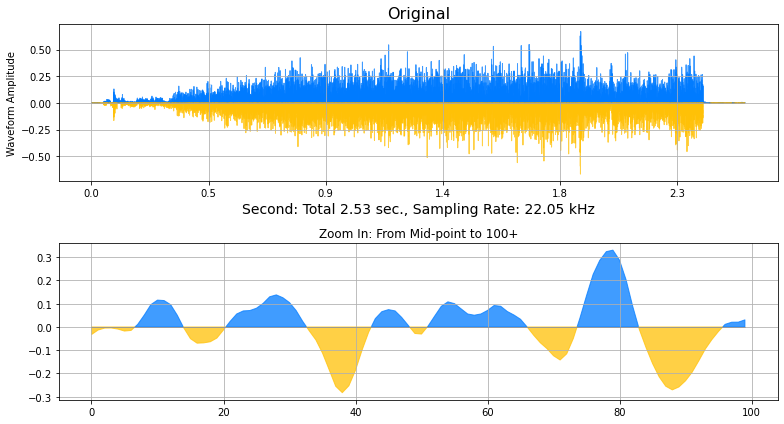

In [51]:
pluto.draw_audio(pluto.df_sound_data)

## scratch

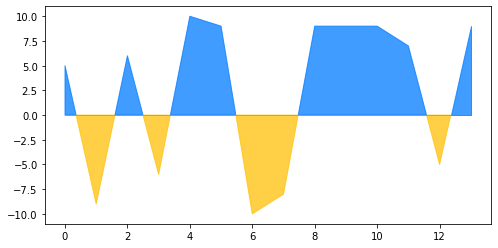

In [68]:
income = numpy.array([5., -9., 6., -6., 10.,9.,-10.,-8.,9.,9.,9.,7.,-5,9])
canvas, pic = matplotlib.pyplot.subplots(figsize=(8, 4))
pluto._draw_area_with_neg(income, pic)
canvas.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
time = np.arange(12)
income = np.array([5, 9, 6, 6, -10, 7, 6, 4, 4, -5, 6, 4])
expenses = np.array([-6, 6, -8, 3, 6, 9, -7, 8, -6, 6, -4, 8])
xzero = np.zeros(len(time))
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
# ax.plot(time, income, color="green")
ax.plot(time, expenses, color="red")
ax.plot(time, xzero, color="gray")

# Fill area when income > expenses with green
ax.fill_between(
    time, xzero, expenses, where=(xzero > expenses), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)

# Fill area when income <= expenses with red
ax.fill_between(
    time, xzero, expenses, where=(xzero <= expenses), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)

ax.legend();

## scratch

In [32]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def _draw_area_with_neg(self,ndata,pic,color="pink",alpha=0.3,i_start=0):
  _len = len(ndata)
  _zero = numpy.zeros(_len,dtype=float)
  start = i_start
  end = start + _len
  x1 = numpy.arange(start, end, dtype=int)
  # Plot lines
  pic.plot(x1,ndata, color=color,alpha=alpha)
  pic.plot(x1, _zero, color=color)

  # Fill area 
  pic.fill_between(
    x1,ndata, _zero, 
    interpolate=True, color=color, alpha=alpha, 
  )
  #

# @add_method(PacktDataAug)
# def _draw_area_with_neg(self,df,pic,color="pink",alpha=0.3,i_start=0):
#   y1 = numpy.concatenate(df.values, axis=0)
#   #
#   y2 = numpy.zeros(len(y1),dtype=float)
#   start = i_start
#   end = start + len(y1)
#   x1 = numpy.arange(start, end, dtype=int)
#   # Plot lines
#   pic.plot(x1,y1, color=color,alpha=alpha)
#   pic.plot(x1, y2, color=color)

#   # Fill area 
#   pic.fill_between(
#     x1,y1, y2, 
#     interpolate=True, color=color, alpha=alpha, 
#   )
#   #

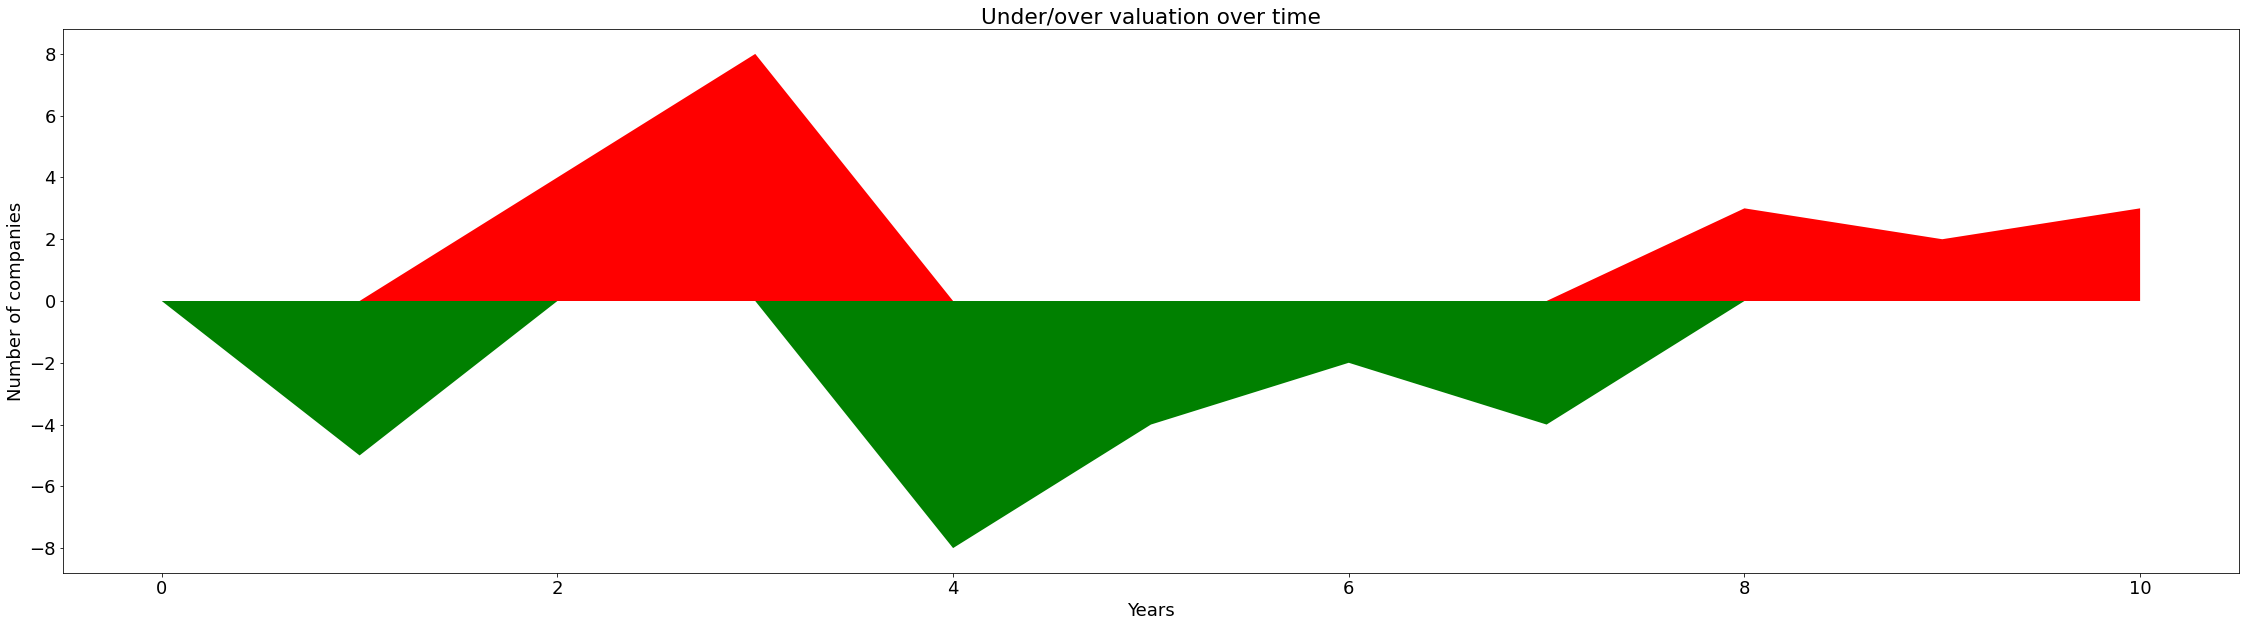

In [37]:
import matplotlib.pyplot as plt

x_axis = [0,1,2,3,4,5,6,7,8,9,10]
cheap = [0,-5,0,0,-8,-4,-2,-4,0,0,0]
expensive = [0,0,4,8,0,0,0,0,3,2,3]


fig_size = plt.rcParams["figure.figsize"] #set chart size (longer than taller)
fig_size[0] = 39
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 18}) 

plt.stackplot(x_axis, expensive, colors=['r'])
plt.stackplot(x_axis, cheap, colors=['g'])

# plt.plot([],[],color='r', label='Above great case', linewidth=5)
# plt.plot([],[],color='g', label='Below low case', linewidth=5)
# plt.legend()

plt.xlabel('Years')
plt.ylabel('Number of companies')
plt.title('Under/over valuation over time')
plt.show()

In [26]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def _draw_audio(self,df):
  nrow = 2
  ncol = 1
  w = 12
  h = 8
  title = ['Original', 'Zoom In']
  canvas, pic = matplotlib.pyplot.subplots(nrow, ncol, figsize=(w, h))
  pics = pic.flatten()
  #pics = [pic]
  # select random images
  samp = df.sample(int(ncol * nrow))
  samp.reset_index(drop=True, inplace=True)
  data_freq, sam_rate = librosa.load(samp.fname[0])
  df_samp = pandas.DataFrame(data_freq, columns=['data_freq'])
  # draw original
  df_samp.data_freq.plot.line(ax=pics[0],color='#28a745')
  pics[0].set_title(title[0])
  pics[0].grid()
  # draw zoom
  mid = int(len(data_freq) / 2)
  end = mid + 100
  df_samp.data_freq[mid:end].plot.line(ax=pics[1],color='#17a2b8')
  # librosa.display.waveplot(data_freq, sr=sam_rate, ax=ax, color='#17a2b8')
  #
  pics[1].set_title(title[1])
  pics[1].grid()
  #
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return data_freq
#
@add_method(PacktDataAug)
def draw_audio(self,df):
  self._draw_audio(df)
#

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


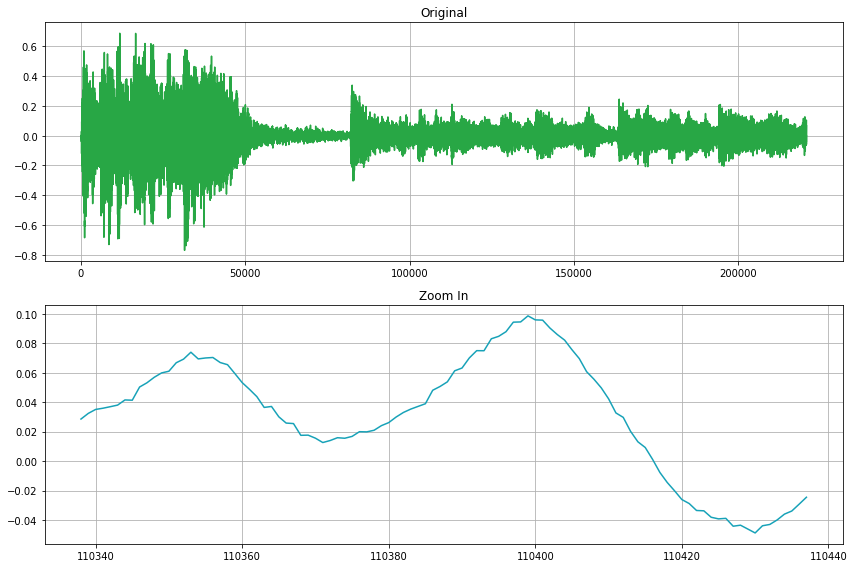

In [27]:
x = pluto._draw_audio(pluto.df_music_data)

In [31]:
import matplotlib.pyplot as plt
plt.plot(list2,spi1,color = 'black')
plt.ylabel('Standardized precipitation index')
plt.xlabel('Time (years)')
plt.show()

ValueError: ignored

In [ ]:
y1positive=np.array(spi1)>=0
y1negative = np.array(spi1)<=0
plt.fill_between(list2,spi1,y2=0,where=y1positive,
color='green',alpha=0.5,interpolate=False)
plt.fill_between(list2,spi1,y2=0,where=y1negative,
color='red',alpha=0.5,interpolate=False)

In [ ]:
plt.bar(
    df['Latitude'], df['TempAnom'],
    color=np.where(df['TempAnom'] < 0, 'deepskyblue', 'crimson'),
)

ax.xaxis.set_ticks(np.arange(-90, 91, 15))

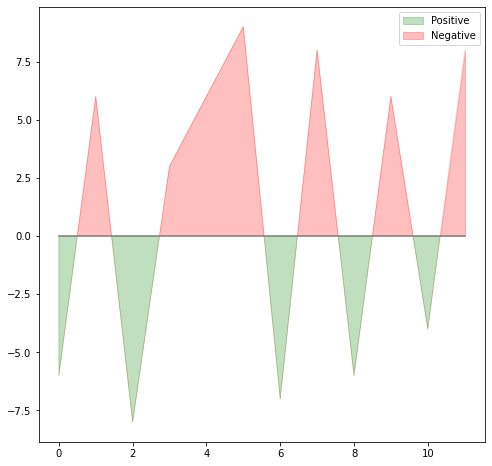

In [11]:
import matplotlib.pyplot as plt
import numpy as np
time = np.arange(12)
income = np.array([5, 9, 6, 6, -10, 7, 6, 4, 4, -5, 6, 4])
expenses = np.array([-6, 6, -8, 3, 6, 9, -7, 8, -6, 6, -4, 8])
xzero = np.zeros(len(time))
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
# ax.plot(time, income, color="green")
ax.plot(time, expenses, color="red")
ax.plot(time, xzero, color="gray")

# Fill area when income > expenses with green
ax.fill_between(
    time, xzero, expenses, where=(xzero > expenses), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)

# Fill area when income <= expenses with red
ax.fill_between(
    time, xzero, expenses, where=(xzero <= expenses), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)

ax.legend();

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


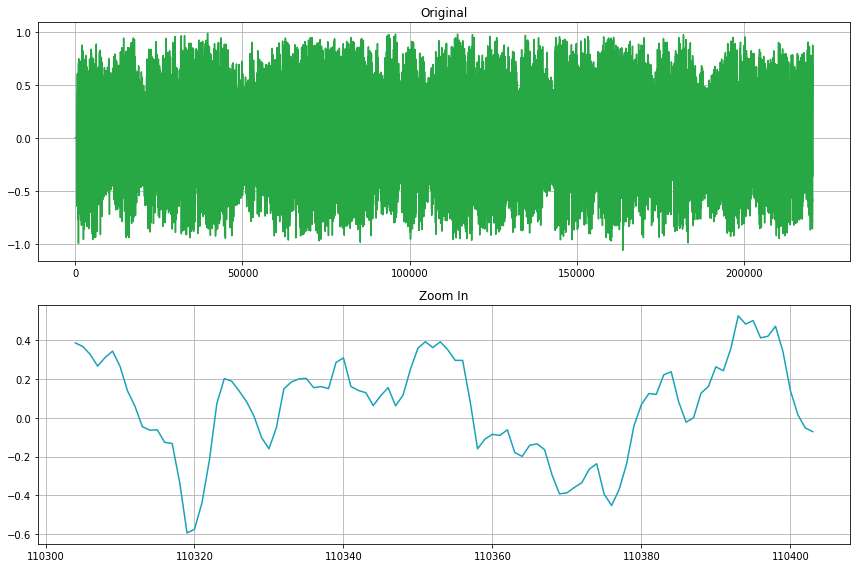

In [24]:
pluto.draw_audio(pluto.df_music_data)

In [25]:
librosa.load?

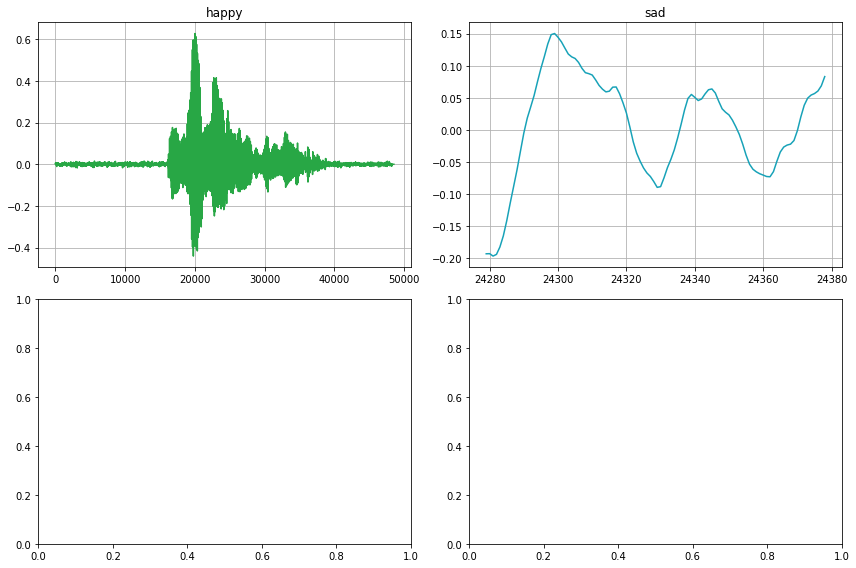

In [ ]:
pluto.draw_audio(pluto.df_voice_data)

In [ ]:
x.head()

,GroupID,ImageID,Target,Shapes,fname
0,Happy158,Happy15814.wav,Happy,220608,kaggle/musical-emotions-classification/Audio_F...
1,Happy152,Happy15207.wav,Happy,220677,kaggle/musical-emotions-classification/Audio_F...
2,Sad218,Sad21809.wav,Sad,220677,kaggle/musical-emotions-classification/Audio_F...
3,Sad196,Sad19601.wav,Sad,220608,kaggle/musical-emotions-classification/Audio_F...


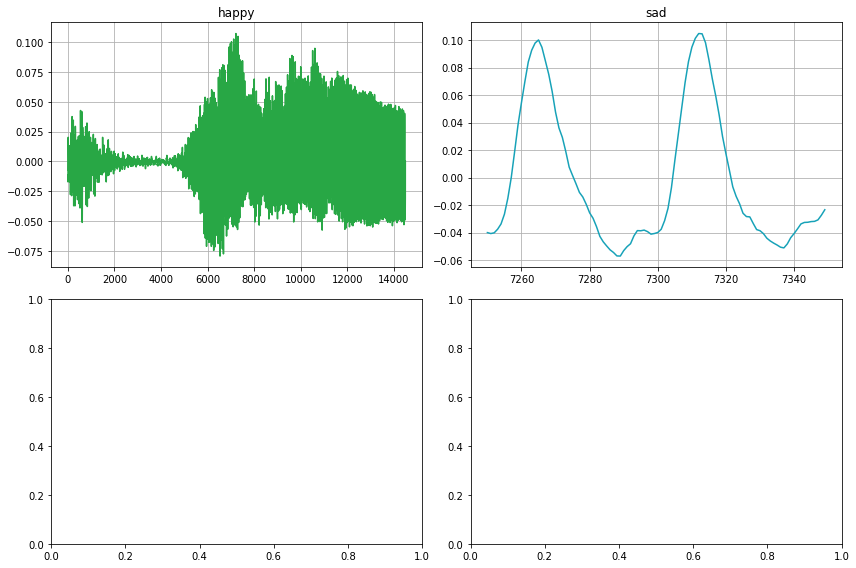

In [ ]:
pluto.draw_audio(pluto.df_sound_data)

In [ ]:
#f1 = 'kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/Happy/Happy10200.wav'
f1 = pluto.df_music_data.fname[0]
IPython.display.Audio(f1)

In [ ]:
#f2 = 'kaggle/cremad/AudioWAV/1085_IWL_ANG_XX.wav'
f2 = pluto.df_voice_data.fname[0]
IPython.display.Audio(f2)

In [ ]:
# f3 = 'kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio/fold4/135528-6-8-0.wav'
f3 = pluto.df_sound_data.fname[3]
IPython.display.display(IPython.display.Audio(f3))

In [ ]:
import librosa
import librosa.display
data_freq, sam_rate = librosa.load(f1)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print(data_freq.shape, sam_rate, len(data_freq)/sam_rate)

(220608,) 22050 10.004897959183673


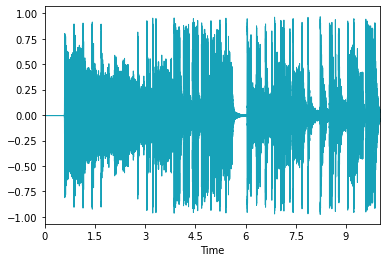

In [ ]:
librosa.display.waveplot(data_freq, sr=sam_rate, color='#17a2b8')

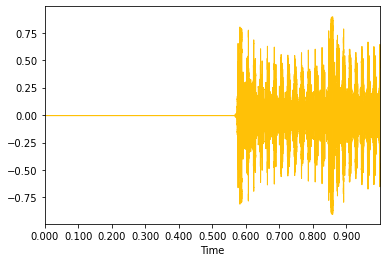

In [ ]:
librosa.display.waveplot(data_freq[:sam_rate], sr=sam_rate, color='#ffc107')

In [ ]:
import pandas
df = pandas.DataFrame(data_freq, columns=['data_freq'])
df.head(3)

,data_freq
0,0.0
1,0.0
2,0.0


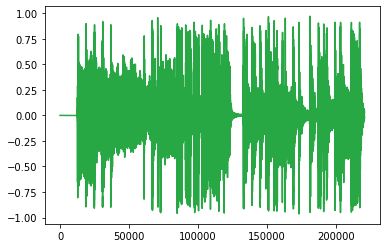

In [ ]:
df.data_freq.plot.line(color='#28a745')

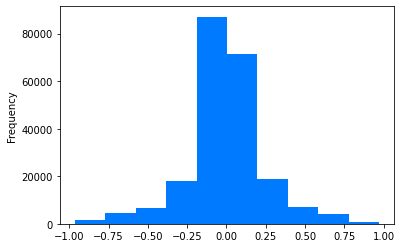

In [ ]:
df.data_freq.plot.hist(color='#007bff')

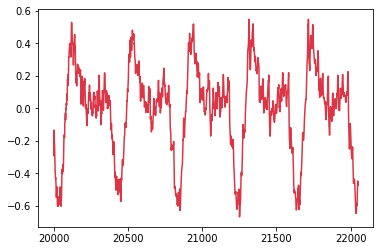

In [ ]:
# ax = df.data_freq[20000:sam_rate].plot.line(color='#dc3545',linewidth=0.0)
ax = df.data_freq[20000:sam_rate].plot.line(color='#dc3545')

In [ ]:
# #6c757d
# ax1.fill_between(x, y1)
# ax1.set_title('fill between y1 and 0')

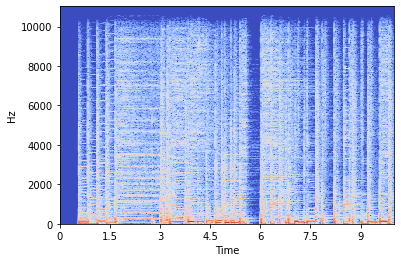

In [ ]:
X = librosa.stft(data_freq)
Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sam_rate, x_axis='time', y_axis='hz')

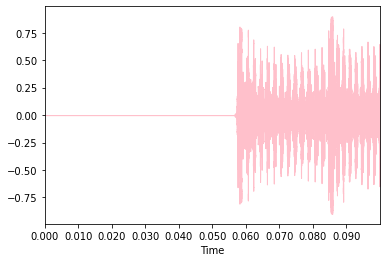

In [ ]:
librosa.display.waveplot(data_freq[:sam_rate], sr=sam_rate*10,color='pink')

In [ ]:
IPython.display.Audio(data_freq, rate=sam_rate)

In [ ]:
IPython.display.Audio(data_freq, rate=sam_rate/2)

In [ ]:
IPython.display.Audio(data_freq, rate=sam_rate*2)

# Push up all changes (Optional)

- username: duchaba

- password: [use the token]

In [ ]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
# !git add -A
# !git config --global user.email "duc.haba@gmail.com"
# !git config --global user.name "duchaba"
# !git commit -m "end of session"
# # do the git push in the xterm console
# #!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
# %%script false --no-raise-error  #temporary stop execute for export file

# Summary 

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- Pluto wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.

- Use Xterm to debug cloud server



In [ ]:
# !pip install colab-xterm
# %load_ext colabxterm
# %xterm